In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
cancer_df= pd.read_csv('haberman.csv')
cancer_df.columns=['Age','Operted_Yr','pstive_lymph_nodes','surv_status_after_5_yrs']
cancer_df.head()



,Age,Operted_Yr,pstive_lymph_nodes,surv_status_after_5_yrs
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [3]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      305 non-null    int64
 1   Operted_Yr               305 non-null    int64
 2   pstive_lymph_nodes       305 non-null    int64
 3   surv_status_after_5_yrs  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [4]:
#changing the label and data type of our target feature i.e. survival_status
cancer_df['surv_status_after_5_yrs']=cancer_df['surv_status_after_5_yrs'].map({1:'Yes',2:'No'})
cancer_df['surv_status_after_5_yrs']=cancer_df['surv_status_after_5_yrs'].astype('category')
cancer_df.head(3)
new_df1=cancer_df.copy()
new_df1.head()

,Age,Operted_Yr,pstive_lymph_nodes,surv_status_after_5_yrs
0,30,62,3,Yes
1,30,65,0,Yes
2,31,59,2,Yes
3,31,65,4,Yes
4,33,58,10,Yes


In [5]:
(cancer_df['surv_status_after_5_yrs'].value_counts()/cancer_df.shape[0])*100

Yes    73.442623
No     26.557377
Name: surv_status_after_5_yrs, dtype: float64

# Overall Preview of Features w.r.t Survival Status

### Histogram

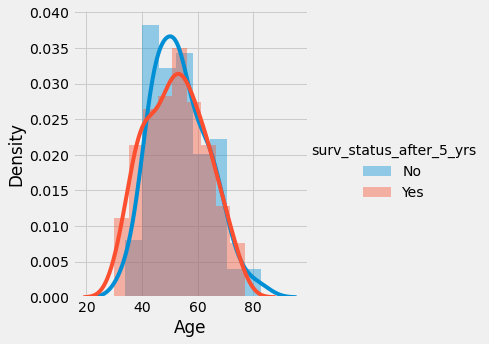

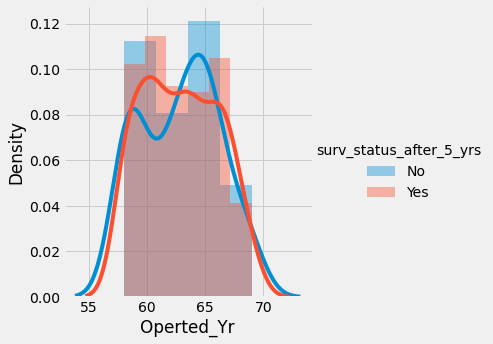

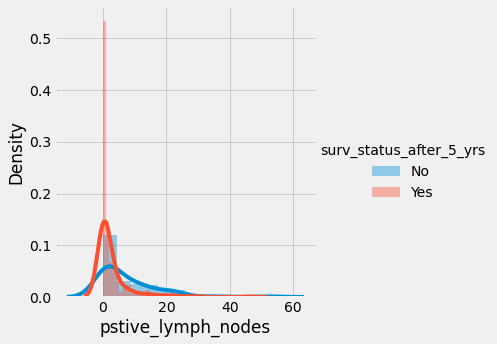

In [6]:
#creating multiple graphs from columns with facetgrid
for idx, feature in enumerate(list(new_df1.columns)[:-1]):
    fg = sns.FacetGrid(new_df1, hue='surv_status_after_5_yrs', size=5)
    fg.map(sns.distplot, feature).add_legend()
    

#### Conclusion
1. Age distribution is same for survival and well as fatal patients
2. Mortality is high around 1965 while survivality is high around 1960
3. Most of the lymph node number data is concentrated around 0 and 1

### Boxplot

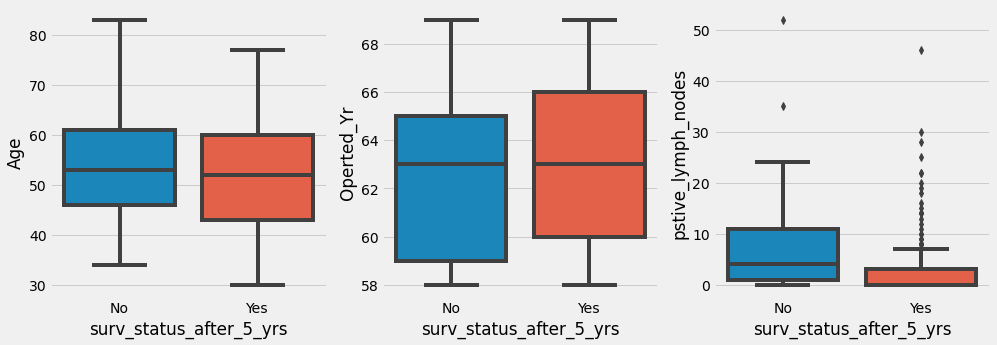

In [7]:
fig, axes= plt.subplots(1,3, figsize=(15,5))
for idx, feature in enumerate(list(new_df1.columns)[:-1]):
     sns.boxplot(data=new_df1, x='surv_status_after_5_yrs', y= feature, ax= axes[idx])

### Violinplot

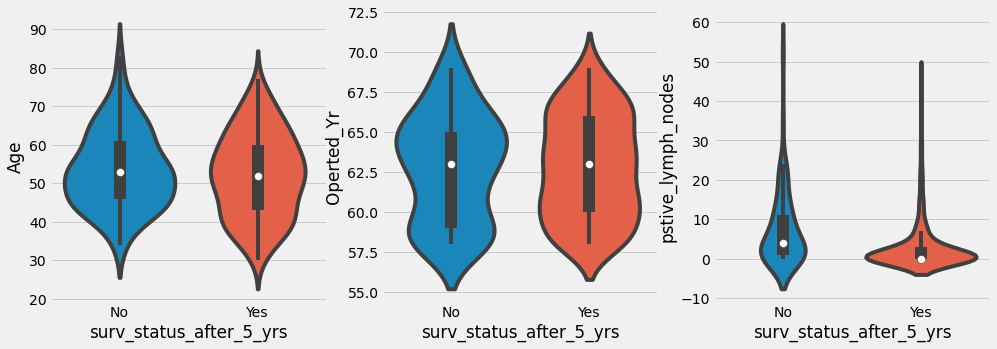

In [8]:
fig, ax= plt.subplots(1,3, figsize=(15,5))
for idx,feature in enumerate(new_df1.columns[:-1]):
        sns.violinplot(data=new_df1, x='surv_status_after_5_yrs', y=feature, ax=ax[idx])      

#### Conclusion
1. Age for those who survived after 5 yrs is starting slightly younger than those who not survived
2. Regarding mortality the operated year around 1965 is showing a distinct bulge for those who did not survived
3. The data for lymph not is showing highly skewed around 0 and 1 while for those did not survived is elongated and
   more uniform in its distribution.

# Univariate Analysis

### Age

In [9]:
#creating a statiscal summary of Age 
cancer_df.Age.describe()

count    305.000000
mean      52.531148
std       10.744024
min       30.000000
25%       44.000000
50%       52.000000
75%       61.000000
max       83.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

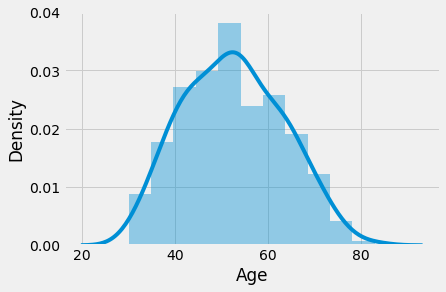

In [10]:
#creating a distribution of age
sns.distplot(cancer_df['Age'])

Text(0.5, 0.98, 'Patients a/c age bands')

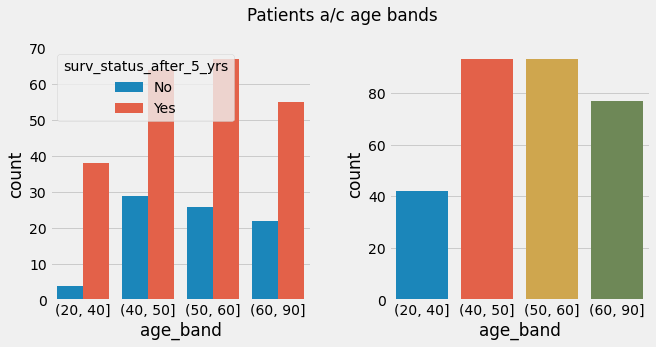

In [11]:
#analysis of segment wise age survival
age_band=[20,40,50,60,90]
cancer_df['age_band']=pd.cut(cancer_df['Age'],bins=age_band )
fig,axes=plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig.tight_layout(pad=3)
sns.countplot(ax=axes[0],data=cancer_df, x='age_band',hue='surv_status_after_5_yrs')
sns.countplot(ax=axes[1],data=cancer_df, x='age_band')
fig.suptitle('Patients a/c age bands')
    

### Conclusion
Age is evenly spread out a/c to the above figure around mean which is also refleacted when we look w.r.t those who survived.
Taking apart age segment wise with 10 yrs difference band here also age distribution looks more or less same. So, it concludes that age has little role to play in survivality of the patient after 5 years.

### Operated Year

<AxesSubplot:xlabel='Operted_Yr', ylabel='count'>

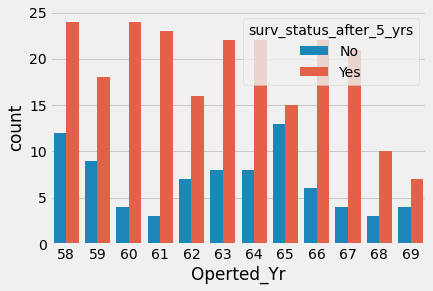

In [12]:
sns.countplot(data=cancer_df, x='Operted_Yr', hue='surv_status_after_5_yrs')

### Conclusion
If we look at the year in which the maximum fatalities took place it would be 1965 and the least would 1960

<AxesSubplot:xlabel='Operated_Yr_band', ylabel='count'>

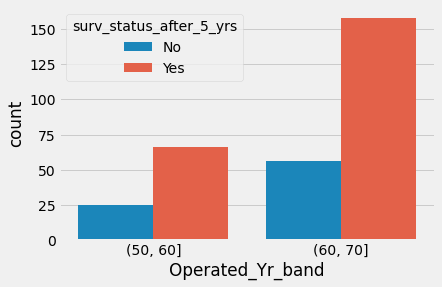

In [13]:
decade=[50,60,70]
cancer_df['Operated_Yr_band']= pd.cut(cancer_df['Operted_Yr'], bins=decade)
cancer_df['Operated_Yr_band'].value_counts()
sns.countplot(data= cancer_df, x='Operated_Yr_band', hue='surv_status_after_5_yrs')

In [14]:
#calcu;ating seperately not survived values and total cases values
var=(cancer_df['surv_status_after_5_yrs']=='No')
a=cancer_df[var]['Operated_Yr_band'].value_counts()
b=cancer_df.groupby('Operated_Yr_band').agg({'Operated_Yr_band':'count'})
#making it in a dataframe
op_data= pd.concat([a,b], axis=1)
op_data.columns=['Not Survived','Total']
op_data["result pc"] = (op_data["Not Survived"].div(op_data["Total"].values))*100
op_data=op_data[::-1]
op_data

,Not Survived,Total,result pc
"(50, 60]",25,91,27.472527
"(60, 70]",56,214,26.168224


### Positive Lymph Nodes

In [15]:
cancer_df['pstive_lymph_nodes'].describe()

count    305.000000
mean       4.036066
std        7.199370
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       52.000000
Name: pstive_lymph_nodes, dtype: float64

<AxesSubplot:xlabel='surv_status_after_5_yrs', ylabel='pstive_lymph_nodes'>

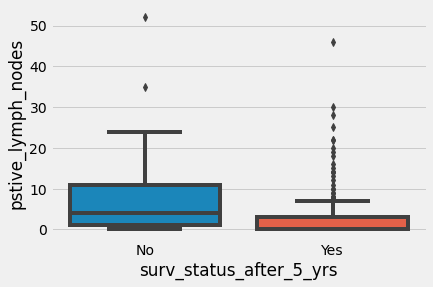

In [16]:
sns.boxplot(data=cancer_df, y='pstive_lymph_nodes',x='surv_status_after_5_yrs')

[Text(0.5, 1.0, 'Lymph Nodes Distribution')]

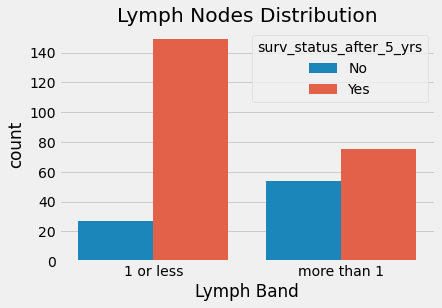

In [17]:
bins=[0,1,55]
labels=['1 or less','more than 1']
cancer_df['Lymph Band']=pd.cut(cancer_df['pstive_lymph_nodes'],bins=bins,labels=labels, include_lowest=True)
sns.countplot(data=cancer_df, x='Lymph Band',hue='surv_status_after_5_yrs').set(title='Lymph Nodes Distribution')

### Conclusion

1. Regarding number of lymph nodes alot of outliers are seen in which survived as compared to the people who have not survived.
2. In the second figure if the lymph node numebr increases  beyond 1 then survival percentages is same as mortality which clearly states the red lines regarding number of lymph nodes


# Bivariate Analysis

<AxesSubplot:>

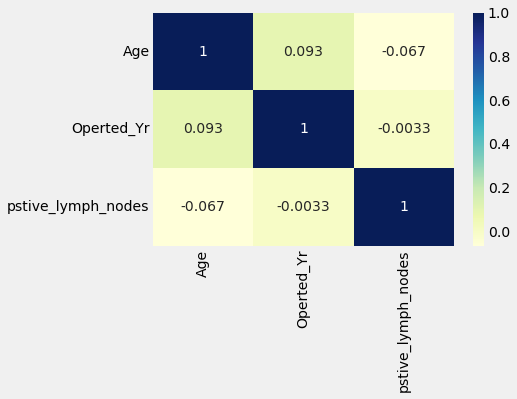

In [18]:
#seeing the correlation between features
sns.heatmap(cancer_df.corr(),cmap="YlGnBu",annot=True)

### Coclusion
From the above figure it clearly shows that none of the abpove features are interrelated to each other and have independant coexistance.

<AxesSubplot:xlabel='Age', ylabel='pstive_lymph_nodes'>

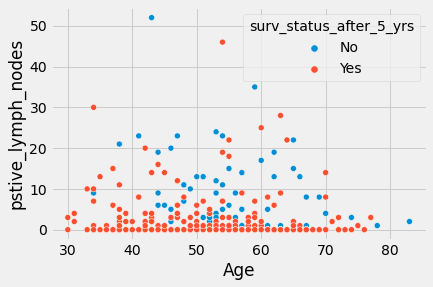

In [19]:
sns.scatterplot(data=cancer_df, y='pstive_lymph_nodes',x='Age', hue='surv_status_after_5_yrs')

## Heatmap

In [20]:
pd.crosstab(cancer_df['age_band'],cancer_df['surv_status_after_5_yrs'])

surv_status_after_5_yrs,No,Yes
age_band,,
"(20, 40]",4,38
"(40, 50]",29,64
"(50, 60]",26,67
"(60, 90]",22,55


<AxesSubplot:xlabel='surv_status_after_5_yrs', ylabel='age_band'>

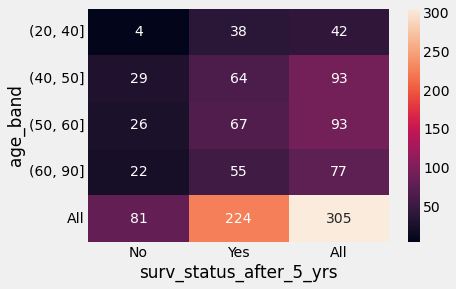

In [21]:
x=pd.crosstab(cancer_df['age_band'],cancer_df['surv_status_after_5_yrs'], margins= True)
sns.heatmap(x, annot=True, fmt='g')

[Text(0.5, 1.0, 'Patients who have not survived')]

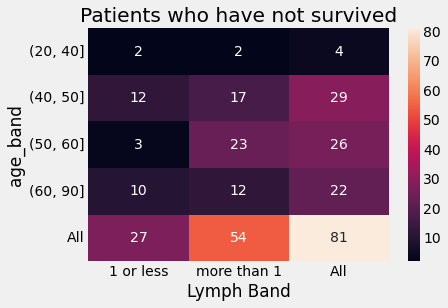

In [22]:
var=(cancer_df['surv_status_after_5_yrs']=='No')
x= pd.crosstab(cancer_df[var]['age_band'],cancer_df[var]['Lymph Band'], margins= True)
sns.heatmap(x, annot=True, fmt='g').set(title="Patients who have not survived")

### Coclusion
Here we see in this bivariate analysis regarding age band v/s lymph nodes that with 50-60 age band the non survival after 5 yrs of operation drastically drops to 3 from a normal 10-12 average even though the number of pateints remaining same as 93

In [23]:
cancer_df.head()

,Age,Operted_Yr,pstive_lymph_nodes,surv_status_after_5_yrs,age_band,Operated_Yr_band,Lymph Band
0,30,62,3,Yes,"(20, 40]","(60, 70]",more than 1
1,30,65,0,Yes,"(20, 40]","(60, 70]",1 or less
2,31,59,2,Yes,"(20, 40]","(50, 60]",more than 1
3,31,65,4,Yes,"(20, 40]","(60, 70]",more than 1
4,33,58,10,Yes,"(20, 40]","(50, 60]",more than 1


In [24]:
desc_df=cancer_df[['age_band','Lymph Band','surv_status_after_5_yrs']]
desc_df

,age_band,Lymph Band,surv_status_after_5_yrs
0,"(20, 40]",more than 1,Yes
1,"(20, 40]",1 or less,Yes
2,"(20, 40]",more than 1,Yes
3,"(20, 40]",more than 1,Yes
4,"(20, 40]",more than 1,Yes
...,...,...,...
300,"(60, 90]",1 or less,Yes
301,"(60, 90]",1 or less,Yes
302,"(60, 90]",more than 1,Yes
303,"(60, 90]",1 or less,No


In [25]:
desc_df['Lymph Band'].value_counts(normalize=True)*100

1 or less      57.704918
more than 1    42.295082
Name: Lymph Band, dtype: float64

In [26]:
desc_df['surv_status_after_5_yrs'].value_counts(normalize=True)*100

Yes    73.442623
No     26.557377
Name: surv_status_after_5_yrs, dtype: float64

In [27]:
desc_df['age_band'].value_counts(normalize=True)*100

(40, 50]    30.491803
(50, 60]    30.491803
(60, 90]    25.245902
(20, 40]    13.770492
Name: age_band, dtype: float64

In [28]:
desc_df['surv_status_after_5_yrs']=desc_df['surv_status_after_5_yrs'].replace({'Yes':1,'No':0})

In [29]:
desc_df

,age_band,Lymph Band,surv_status_after_5_yrs
0,"(20, 40]",more than 1,1
1,"(20, 40]",1 or less,1
2,"(20, 40]",more than 1,1
3,"(20, 40]",more than 1,1
4,"(20, 40]",more than 1,1
...,...,...,...
300,"(60, 90]",1 or less,1
301,"(60, 90]",1 or less,1
302,"(60, 90]",more than 1,1
303,"(60, 90]",1 or less,0


# Desicion Tree

In [30]:
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score 
from sklearn.tree import plot_tree, export_text


In [31]:
feature_cols=['Lymph Band','age_band']
feature_cols
X=desc_df[feature_cols]
y=desc_df['surv_status_after_5_yrs']

In [32]:
X['Lymph Band'].replace('more than 1','>1', inplace=True)
X['Lymph Band'].replace('1 or less','<=1', inplace=True)

### Encoding the features

In [33]:
clf_lymph= LabelEncoder()
clf_age=LabelEncoder()

In [34]:
X['lymph_n']=clf_lymph.fit_transform(X['Lymph Band'])
X['age_n']=clf_age.fit_transform(X['age_band'])
X

,Lymph Band,age_band,lymph_n,age_n
0,>1,"(20, 40]",1,0
1,<=1,"(20, 40]",0,0
2,>1,"(20, 40]",1,0
3,>1,"(20, 40]",1,0
4,>1,"(20, 40]",1,0
...,...,...,...,...
300,<=1,"(60, 90]",0,3
301,<=1,"(60, 90]",0,3
302,>1,"(60, 90]",1,3
303,<=1,"(60, 90]",0,3


In [35]:
X_n=X.drop(['Lymph Band','age_band'], axis=1)
X_n.head()

,lymph_n,age_n
0,1,0
1,0,0
2,1,0
3,1,0
4,1,0


In [36]:
model=tree.DecisionTreeClassifier(random_state=10)

### Test Train Split

In [37]:
X_n_train, X_n_valid, y_train, y_valid = train_test_split(X_n, y, test_size=0.3, random_state=324,stratify =y) 

In [38]:
y_train.value_counts(normalize=True)

1    0.732394
0    0.267606
Name: surv_status_after_5_yrs, dtype: float64

In [39]:
y_valid.value_counts(normalize=True)

1    0.73913
0    0.26087
Name: surv_status_after_5_yrs, dtype: float64

In [40]:
model.fit(X_n_train,y_train)

DecisionTreeClassifier(random_state=10)

In [41]:
print("Training accuracy")
print(model.score(X_n_train,y_train)*100)
print("Validation accuracy")
print(model.score(X_n_valid,y_valid)*100)

Training accuracy
76.52582159624414
Validation accuracy
67.3913043478261


In [42]:
model.predict(X_n_valid)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid,new_y)

0.6739130434782609

### Hyperparameter Tuning

### Changing the maximum depth

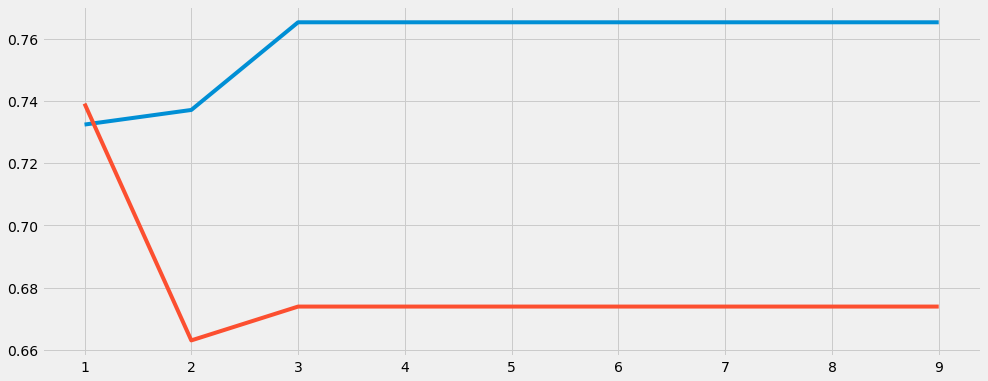

In [47]:
# maximum depth
train_accuracy=[]
validation_accuracy=[]
for depth in range(1,10):
    model=DecisionTreeClassifier(max_depth=depth, random_state=10)
    model.fit(X_n_train,y_train)
    train_accuracy.append(model.score(X_n_train,y_train))
    validation_accuracy.append(model.score(X_n_valid,y_valid))
frame=pd.DataFrame({"Max_depth": range(1,10),"Train_score":train_accuracy,"Valid_score":validation_accuracy})
plt.figure(figsize=(15,6))
plt.plot(frame['Max_depth'],frame['Train_score'] )
plt.plot(frame['Max_depth'],frame['Valid_score'] ) 

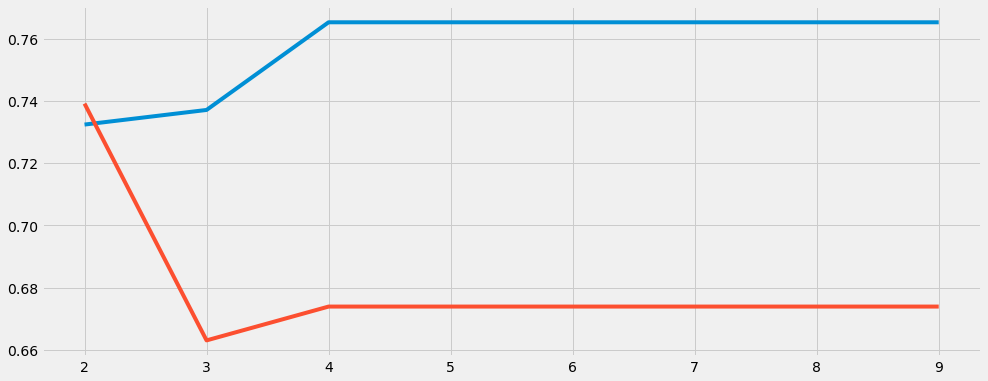

In [48]:
#maximum leaf node
train_accuracy=[]
validation_accuracy=[]
for leaf_node in range(2,10):
    model=DecisionTreeClassifier(max_depth=3,max_leaf_nodes=leaf_node, random_state=10)
    model.fit(X_n_train,y_train)
    train_accuracy.append(model.score(X_n_train,y_train))
    validation_accuracy.append(model.score(X_n_valid,y_valid))
frame=pd.DataFrame({"Max_Leaf_node": range(2,10),"Train_score":train_accuracy,"Valid_score":validation_accuracy})
plt.figure(figsize=(15,6))
plt.plot(frame['Max_Leaf_node'],frame['Train_score'] )
plt.plot(frame['Max_Leaf_node'],frame['Valid_score'] )     

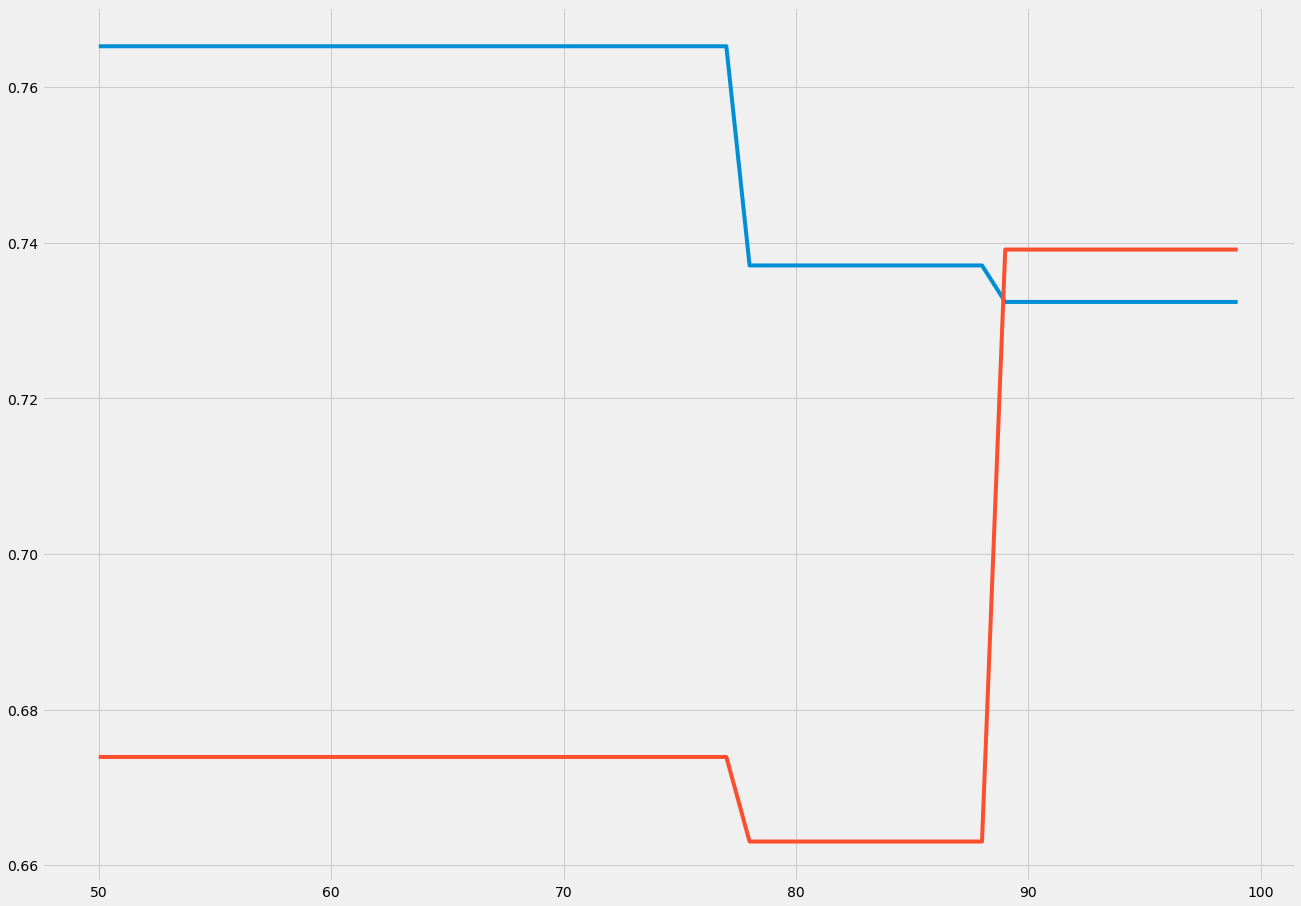

In [49]:
#min sample split
train_accuracy=[]
validation_accuracy=[]
for min_sample_split in range(50,100):
    model=DecisionTreeClassifier(max_depth=3,max_leaf_nodes=4,min_samples_split=min_sample_split, random_state=10)
    model.fit(X_n_train,y_train)
    train_accuracy.append(model.score(X_n_train,y_train))
    validation_accuracy.append(model.score(X_n_valid,y_valid))
frame=pd.DataFrame({"Min_sample_split": range(50,100),"Train_score":train_accuracy,"Valid_score":validation_accuracy})
frame
plt.figure(figsize=(20,15))
plt.plot(frame['Min_sample_split'],frame['Train_score'] )
plt.plot(frame['Min_sample_split'],frame['Valid_score'] )     


In [50]:
model=DecisionTreeClassifier(max_depth=3,max_leaf_nodes=4,min_samples_split=87, random_state=10)
model.fit(X_n_train,y_train)
print("Training :",model.score(X_n_train,y_train)*100)
print("Validation :",model.score(X_n_valid,y_valid)*100)

Training : 73.70892018779342
Validation : 66.30434782608695


In [51]:
y_train=y_train.replace({1:"Yes",0:"No"})
y_test=y_train.replace({1:"Yes",0:"No"})
y_train


159     No
59     Yes
121    Yes
76     Yes
148    Yes
      ... 
91      No
194    Yes
65     Yes
189     No
256    Yes
Name: surv_status_after_5_yrs, Length: 213, dtype: category
Categories (2, object): ['No', 'Yes']

In [52]:
model.fit(X_n_train,y_train)
model.classes_

array(['No', 'Yes'], dtype=object)

### Plotting Decision Tree

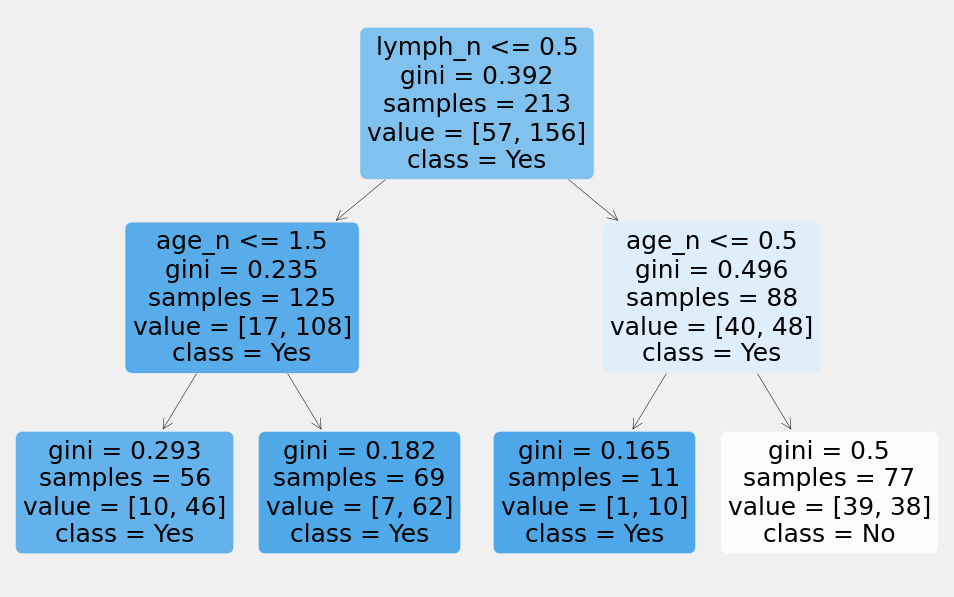

In [53]:
plt.figure(figsize=(15,10))
plot_tree(model, max_depth=3, feature_names=X_n_train.columns, filled=True, rounded=True, class_names=model.classes_);

# KNN

In [54]:
cancer_df=cancer_df.drop(['age_band','Operated_Yr_band','Lymph Band'],axis=1)

In [55]:
cancer_df['surv_status_after_5_yrs'].value_counts(normalize=True)*100

Yes    73.442623
No     26.557377
Name: surv_status_after_5_yrs, dtype: float64

In [56]:
X = cancer_df.drop(["surv_status_after_5_yrs"],axis=1)
y=cancer_df['surv_status_after_5_yrs']

In [110]:
from sklearn.model_selection import train_test_split  
#first splitting the dataset into train and remaining dataset
X_train, X_rem, y_train, y_rem= train_test_split(X, y, test_size= 0.30, random_state=0)
#the remaining dataset to be further split into testing and validation dataet
X_valid,X_test,y_valid,y_test=train_test_split(X_rem,y_rem, test_size=0.5, random_state=0)


## Feature Scaling

In [58]:
#the feature scaling of functions through min max scaler 
from sklearn import preprocessing as PPC
model = PPC.MinMaxScaler(feature_range=(0, 1))

X_train=model.fit_transform(X_train)
X_test=model.fit_transform(X_test)


In [111]:
#teating the score withe various value of K and plotting the results
from sklearn.neighbors import KNeighborsClassifier
accuracy=[]
test=[]
for i in range(1,20):
    model= KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2 )  
    model.fit(X_train, y_train)  
    accuracy.append(model.score(X_train,y_train))
    test.append(model.score(X_valid,y_valid))

<AxesSubplot:xlabel='k', ylabel='train_accuracy'>

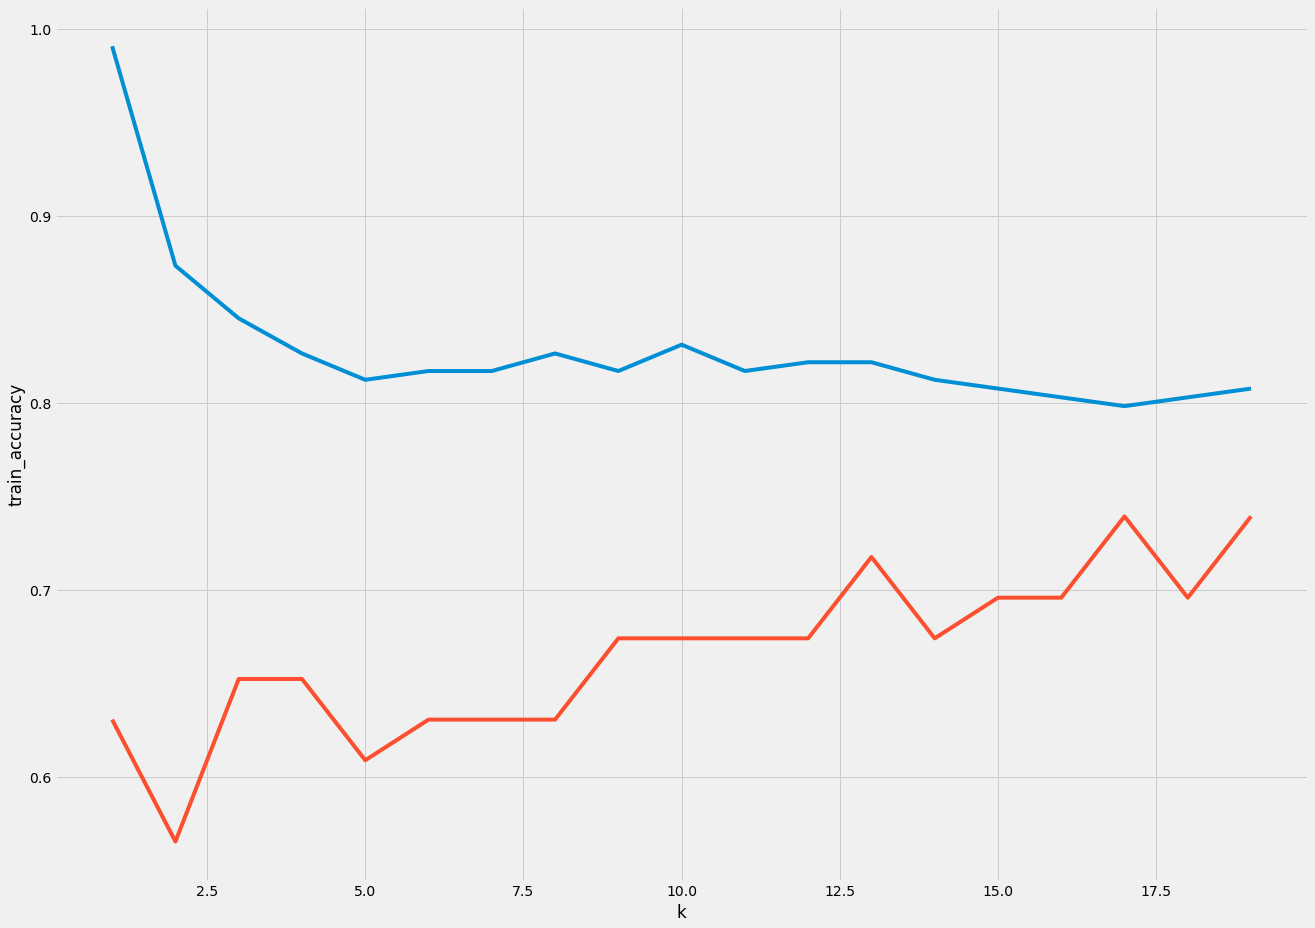

In [112]:
frame=pd.DataFrame({"k":range(1,20),"train_accuracy":accuracy,"test_accuracy":test})
plt.figure(figsize=(20,15))
sns.lineplot(data=frame,x='k',y='train_accuracy')
sns.lineplot(data=frame,x='k',y='test_accuracy')

In [113]:
#Predicting the values on test data
y_pred=model.predict(X_test)


## Confusion Matrix

In [121]:
#calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))


Accuracy :  0.6521739130434783


In [120]:
#Confusion Matrix
cm

array([[ 2, 14],
       [ 2, 28]], dtype=int64)

In [119]:
y_test.value_counts()

Yes    30
No     16
Name: surv_status_after_5_yrs, dtype: int64

y_pred= pd.Series(y_pred, dtype='category')
y_pred.value_counts()

## Precision, Recall and F1 Score

In [115]:
from sklearn import metrics
recall=metrics.recall_score(y_test,y_pred, pos_label="No")
print("Recall :",recall)
precision=metrics.precision_score(y_test,y_pred, pos_label="No")
print("Precision :",precision)
f1=metrics.f1_score(y_test,y_pred, pos_label="No")
print("F1 score :",f1)


Recall : 0.125
Precision : 0.5
F1 score : 0.2


## Conclusion
Accuracy of decision tree is 67.4% while of KNN is 65.21%
